In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

__author__ = "Sid Vanam"
__email__ = "vanamsid@gmail.com"

In [2]:
train_features = pd.read_csv('train_features.csv')
test_features = pd.read_csv('test_features.csv') #DON'T TOUCH

train_sal = pd.read_csv("train_salaries.csv") #only jobID and Salary

In [46]:
def feature_order(feature):
    new = train_full.groupby(feature)['salary'].mean().sort_values().reset_index()
    return new[feature].tolist()

def plot_viz(feature):
    ''' Plots Feature against Salary (Boxenplot)'''
    plt.figure(figsize = (20,7))
    plt.title(feature + ' vs. Salary')
    plt.ylabel('Salary')
    plt.xlabel(feature)
    if feature == 'companyId':
        plt.xticks(rotation = 90)
    
    return sns.boxenplot(x = feature, y = 'salary', data = train_full, order = feature_order(feature))



### Understanding the Data: Shape and Correlation

In [4]:
train_full = train_features.merge(train_sal, on = 'jobId')
train_full.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


Understand that **jobId & companyId** are ***unique identifiers*** for each survey respondant and company

In [5]:
train_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [6]:
print('There are {} Train samples and {} Test samples'.format(train_full.shape[0], test_features.shape[0]))

There are 1000000 Train samples and 1000000 Test samples


#### Checked for Duplicates -- There are none

In [7]:
train_full[train_full.duplicated()]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary


#### DROP 'jobId' as the unique identifier

In [8]:
train_full = train_full.drop('jobId', axis = 1)

### Split train_full --> numerical [num] and categorical [cat] dataframes to easily identify

In [9]:
cat = train_full.select_dtypes(include= 'object')
cat.head()

,companyId,jobType,degree,major,industry
0,COMP37,CFO,MASTERS,MATH,HEALTH
1,COMP19,CEO,HIGH_SCHOOL,NONE,WEB
2,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH
3,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO
4,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE


In [10]:
numeric = train_full.select_dtypes(exclude= 'object')
numeric.head()

,yearsExperience,milesFromMetropolis,salary
0,10,83,130
1,3,73,101
2,10,38,137
3,8,17,142
4,8,16,163


In [11]:
numeric.columns

Index(['yearsExperience', 'milesFromMetropolis', 'salary'], dtype='object')

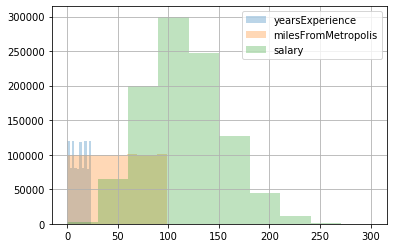

In [12]:
for col in numeric.columns.tolist():
    numeric[col].hist(alpha = 0.3)
    plt.legend([col for col in numeric.columns])

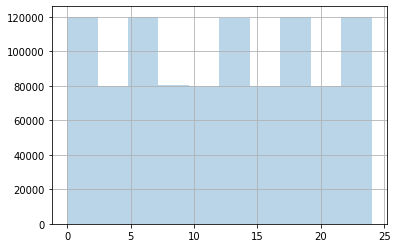

In [13]:
numeric['yearsExperience'].hist(alpha = 0.3)

#### Create lists for Categorical and Numerical columns

In [14]:
category_labels = cat.columns.tolist()
numeric_labels = numeric.columns[numeric.columns != 'salary'].tolist() #exlcude target variable 'Salary'
total_labels = category_labels + numeric_labels

## Understanding Categorical Features vs. Salary

In [15]:
category_labels

['companyId', 'jobType', 'degree', 'major', 'industry']

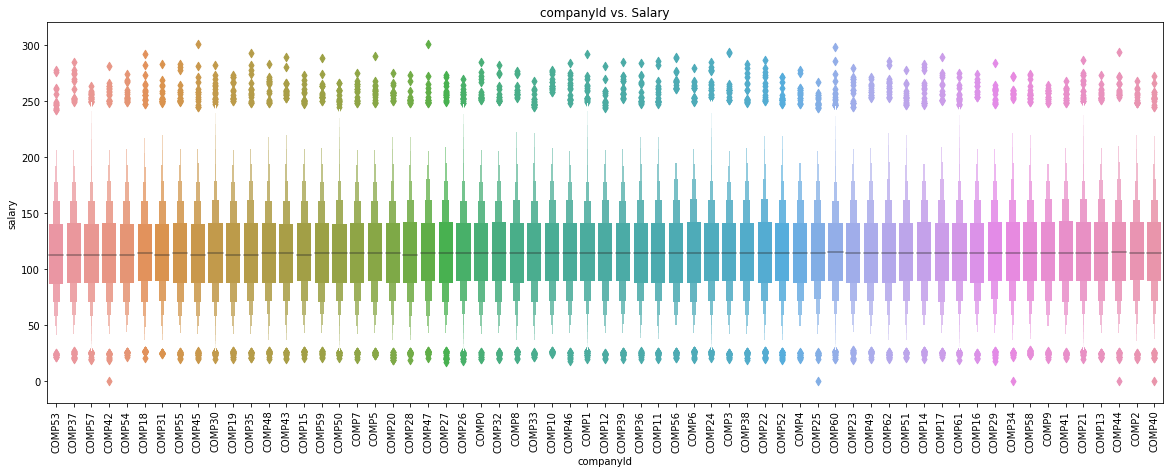

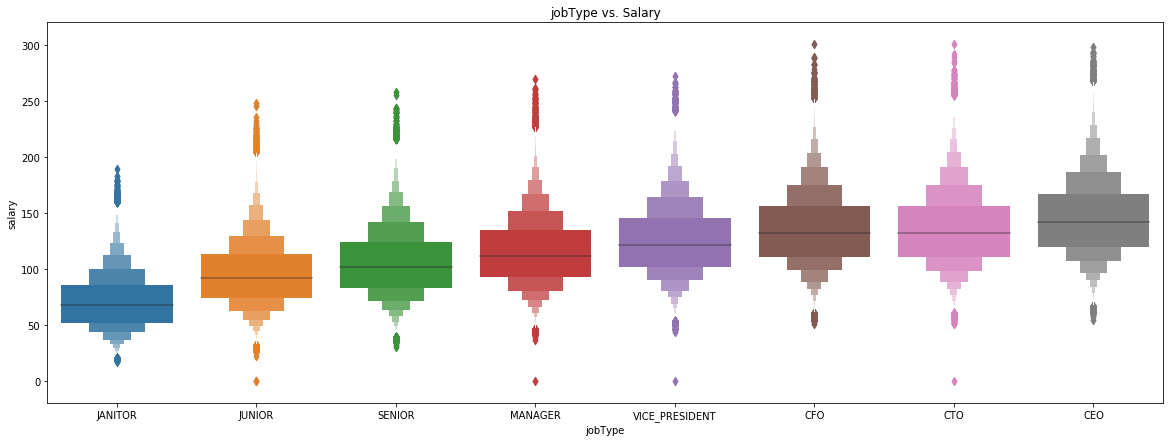

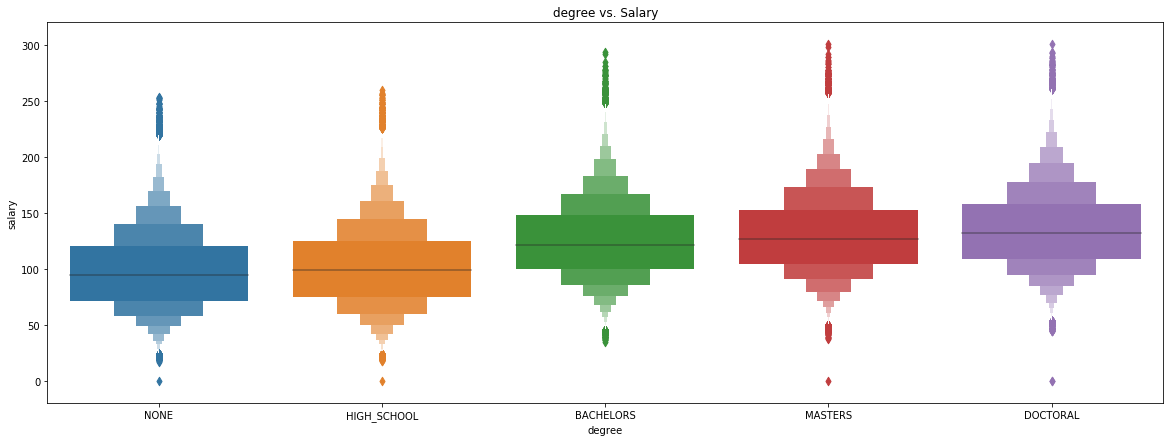

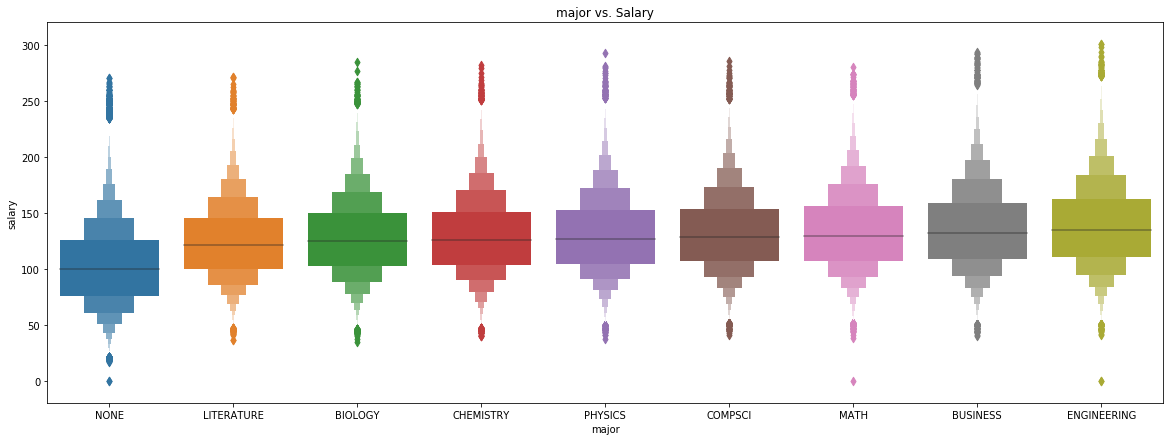

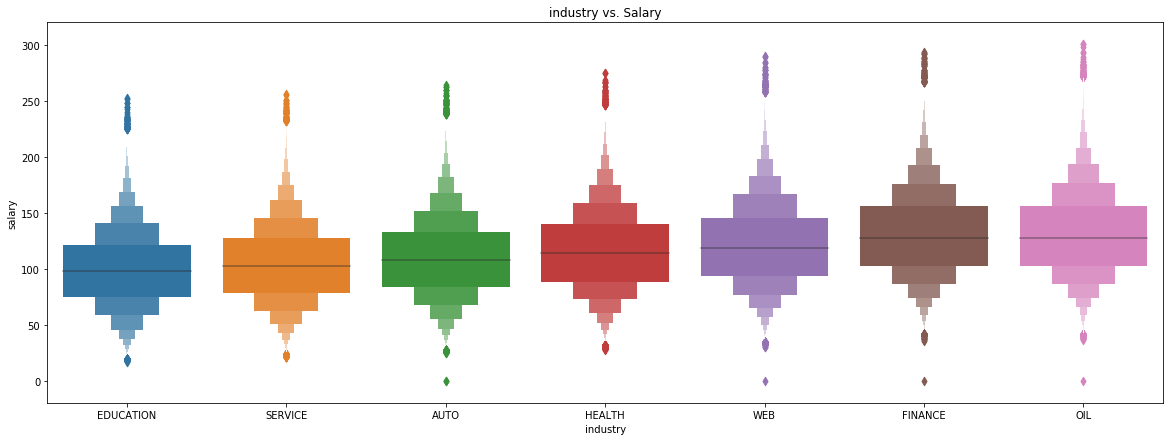

In [16]:
for category in category_labels:
    plot_viz(category)

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

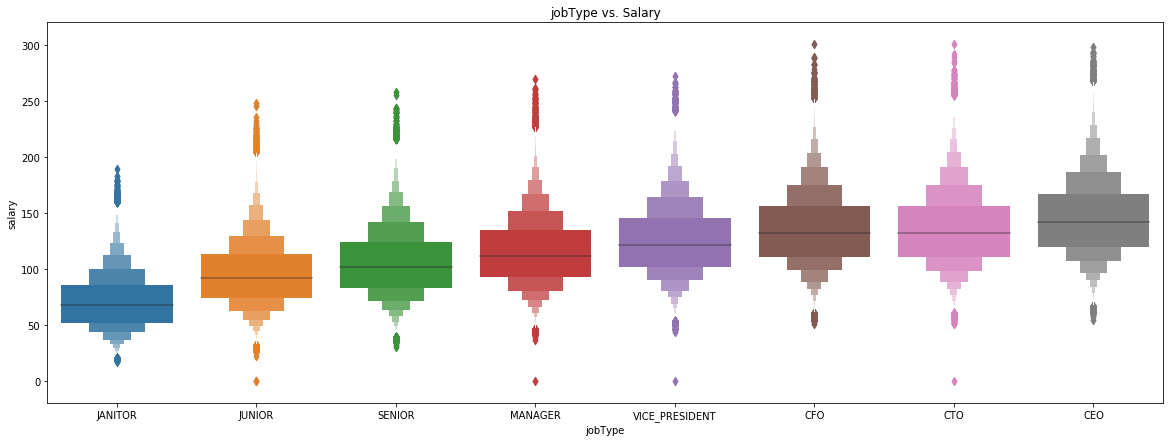

In [47]:
x = plot_viz('jobType', True)

#### Drop CompanyId because it's a unique identifier and shows a relatively similar mean to the other companies -- regardless if higher companyId's indicate a newer client

In [17]:
cat = cat.drop('companyId', axis = 1)

#### One Hot Encode [cat] to feed into ML model

In [18]:
OH_cat = pd.get_dummies(cat, drop_first= True)

## Understanding Numerical Features vs. Salary

In [19]:
numeric_labels

['yearsExperience', 'milesFromMetropolis']

In [20]:
train_full.corr()

,yearsExperience,milesFromMetropolis,salary
yearsExperience,1.000000,0.000673,0.375013
milesFromMetropolis,0.000673,1.000000,-0.297666
salary,0.375013,-0.297666,1.000000


From this we see the yearsExperience has a ***positive*** correlation with salary while milesFromMetropolis has a ***negative*** correlation with salary

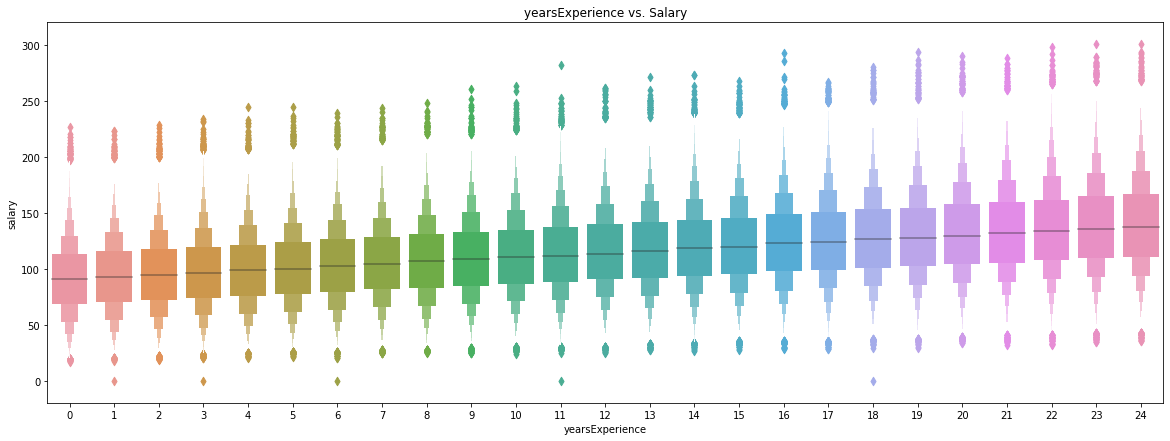

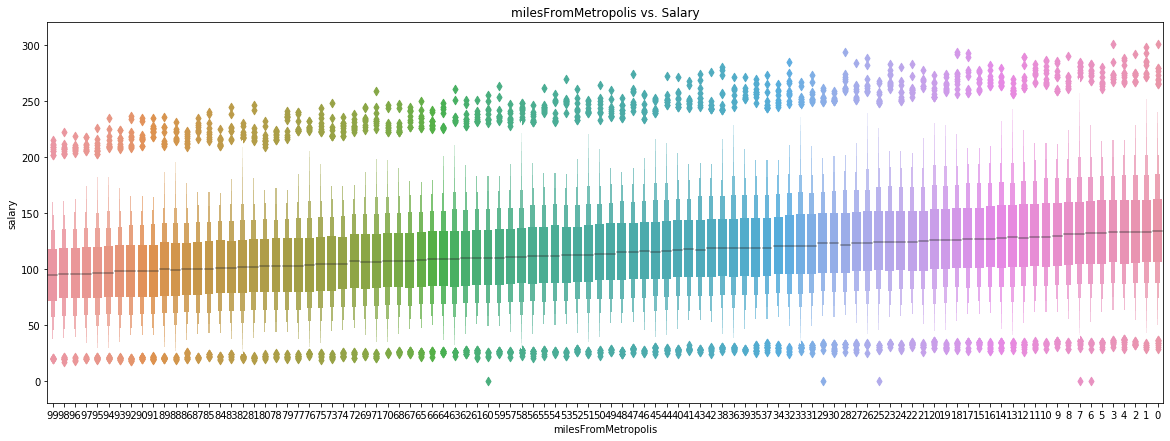

In [21]:
for num in numeric_labels:
    plot_viz(num)

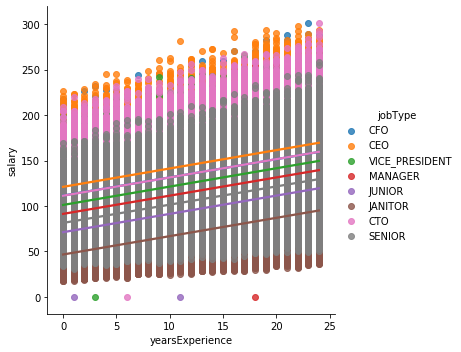

In [22]:
sns.lmplot(x = 'yearsExperience', y = 'salary', data= train_full, hue = 'jobType')

### Create & Drop id col used to merge c and n

In [23]:
OH_cat['id'] = range(OH_cat.shape[0])
numeric['id'] = range(numeric.shape[0])

/Users/vanamsid/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
X_full = pd.merge(OH_cat,numeric, on = 'id')

## Find outliers in the Target variable: LOW and HIGH

In [25]:
high_out = find_outliers(X_full, 'salary', lower = False)
high_out_sort = high_out.sort_values(by = 'salary', ascending= False).head(30)

In [26]:
high_out_sort

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
685562,COMP47,CTO,MASTERS,ENGINEERING,OIL,24,0,301
400611,COMP45,CFO,DOCTORAL,ENGINEERING,OIL,23,3,301
572777,COMP60,CEO,MASTERS,ENGINEERING,OIL,22,1,298
911747,COMP3,CEO,BACHELORS,BUSINESS,FINANCE,24,28,294
293221,COMP44,CEO,DOCTORAL,ENGINEERING,OIL,19,18,294
905713,COMP35,CEO,DOCTORAL,BUSINESS,FINANCE,16,17,293
503962,COMP3,CEO,DOCTORAL,PHYSICS,OIL,24,1,293
884902,COMP1,CTO,MASTERS,BUSINESS,FINANCE,24,2,292
47203,COMP18,CEO,BACHELORS,BUSINESS,FINANCE,22,18,292
377196,COMP5,CEO,DOCTORAL,ENGINEERING,WEB,20,8,290


#### Nothing totally unusual about the upper-bound outliers. There are some high paying salaries for individuals with only 'Bachelors' degrees but often they are CEOs and so this inflated salary is justified.
#### With more time we would learn more information about these unique employees with lower education and a higher position in the company

In [27]:
#LOW
low_out = find_outliers(X_full, 'salary', lower = True)
low_out_sort = low_out.sort_values(by = 'salary').head(30)

In [28]:
low_out_sort

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
495984,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
828156,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0
816129,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
30559,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
652076,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
141942,COMP27,JANITOR,NONE,NONE,EDUCATION,0,98,17
807108,COMP29,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,0,92,18
188931,COMP26,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,96,18
482429,COMP46,JANITOR,NONE,NONE,EDUCATION,0,92,18
692832,COMP20,JANITOR,NONE,NONE,EDUCATION,0,88,19


#### Suspicious to find salaries = 0, higher levels positions such as "Vice Presidents" and "CTOs" should earn some money. 
#### Similarly we assume there are no unpaid internships for Junior jobTypes. But in reality we would check with the data source or data collection team to inquire more about these outliers.
### To account for these outliers, we DROP these rows from both the train and test set 

In [29]:
outlier_indices = low_out_sort.reset_index().iloc[:5]['index']

In [30]:
X_full = X_full.drop(outlier_indices)
test_features = test_features.drop(outlier_indices)

In [31]:
X_full = X_full.drop('id', axis = 1)

## Combine [num] and [cat] data and then create Train and Target tables w/ train_test_split AFTER dropping outliers 

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
y_full = X_full['salary']
X_Full = X_full.drop('salary', axis = 1)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_Full, y_full, shuffle = True,
            test_size = 0.2, random_state = 42)

## Turn all Train and Test splits into pickle objects for the Model Selection Notebook

In [35]:
import pickle

In [36]:
with open('../salary prediction data/TRAIN_X.pkl', 'wb') as temp0:
    pickle.dump(X_train, temp0)
with open('../salary prediction data/TEST_X.pkl', 'wb') as temp1:
    pickle.dump(X_test, temp1)
with open('../salary prediction data/TRAIN_Y.pkl', 'wb') as temp2:
    pickle.dump(y_train, temp2)
with open('../salary prediction data/TEST_Y.pkl', 'wb') as temp3:
    pickle.dump(y_test, temp3)